## Evaluate a single prediction agains ground truth

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Sample HTML code
f = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/13/output2.html"))
pred = f.read()
g = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/13/13.html"))
true = g.read()



[[1.0, 1], [0.9, 2], [1.0, 3], [1.0, 4], [1.0, 5], [0.875, 6], [0.8, 7], [1.0, 9], [1.0, 10], [0.8918918918918919, 11], [1.0, 12], [1.0, 13], [1.0, 14], [1.0, 15], [0.925, 16], [1.0, 17], [1.0, 18], [1.0, 19], [1.0, 21], [1.0, 22], [1.0, 23], [0.8571428571428572, 24], [1.0, 25], [1.0, 27], [1.0, 28], [1.0, 29], [1.0, 30], [1.0, 31], [1.0, 32], [1.0, 33], [1.0, 34], [1.0, 35], [1.0, 36], [1.0, 37], [1.0, 38], [0.22857142857142854, 40], [1.0, 41], [1.0, 42], [1.0, 44], [1.0, 45], [0.5333333333333333, 46], [1.0, 47], [0.36094674556213013, 48], [1.0, 49], [1.0, 50], [1.0, 53], [1.0, 54], [1.0, 55], [1.0, 56], [1.0, 57], [1.0, 58], [0.4, 59], [1.0, 60], [1.0, 61], [0.8666666666666667, 64], [1.0, 65], [1.0, 66], [1.0, 67], [0.3405797101449275, 68], [1.0, 69], [1.0, 70], [1.0, 71], [0.9166666666666666, 72], [1.0, 73], [0.3487394957983193, 74], [1.0, 75], [1.0, 76], [1.0, 77], [1.0, 78], [1.0, 81], [1.0, 82], [1.0, 83], [1.0, 84], [1.0, 85], [1.0, 86], [1.0, 87], [0.8, 88], [0.2941176470588235

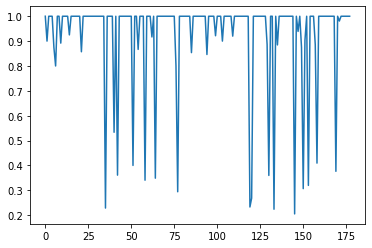

In [8]:
from metric import TEDS
teds = TEDS()
# Initialize TEDS object
ans = []
p = []
for i in range(1,201):
    # Evaluate
    try:
        f = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/output1.html"))
        pred = f.read()
        f.close()
        g = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/"+str(i)+"_noh.html"))
        true = g.read()
        g.close()
        score = teds.structevaluate(pred, true)
        ans+= [score]
        p+=[[score,i]]
    except:
        pass
print(p)
plt.plot(ans)
print(np.mean(ans))

[[1.0, 1], [0.925, 2], [0.8943089430894309, 3], [0.8846153846153846, 4], [1.0, 5], [1.0, 6], [1.0, 7], [0.9, 8], [0.9459459459459459, 9], [1.0, 10], [0.972972972972973, 11], [0.9411764705882353, 12], [0.9428571428571428, 13], [0.6346153846153846, 14], [1.0, 15], [1.0, 16], [0.8698630136986302, 17], [0.8378378378378378, 18], [0.9210526315789473, 19], [0.8846153846153846, 21], [0.966542750929368, 23], [0.9047619047619048, 24], [0.8214285714285714, 25], [0.9836065573770492, 27], [0.8529411764705882, 28], [0.9661016949152542, 29], [0.8229166666666666, 30], [0.8142857142857143, 31], [0.9607843137254902, 32], [0.7076923076923076, 33], [0.9459459459459459, 34], [0.9367088607594937, 35], [0.537037037037037, 36], [0.5714285714285714, 37], [0.9611650485436893, 38], [0.672340425531915, 39], [0.8113207547169812, 41], [0.8166666666666667, 42], [0.37688442211055273, 44], [0.9148936170212766, 45], [0.8577777777777778, 46], [1.0, 47], [0.8284023668639053, 48], [0.8870967741935484, 49], [1.0, 50], [0.8

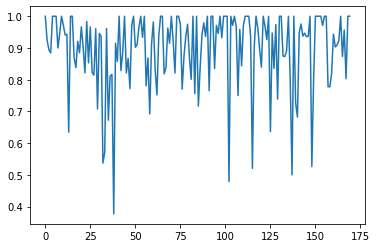

In [9]:
from metric import TEDS
teds = TEDS()
# Initialize TEDS object
ans = []
p = []
for i in range(1,201):
    # Evaluate
    try:
        f = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/output2.html"))
        pred = f.read()
        f.close()
        g = open(os.path.expanduser("~/Downloads/pdf2charinfo/samples/FinalTest/"+str(i)+"/"+str(i)+"_noh.html"))
        true = g.read()
        g.close()
        score = teds.structevaluate(pred, true)
        ans+= [score]
        p+=[[score,i]]
    except:
        pass
print(p)
plt.plot(ans)
print(np.mean(ans))

## Batch evaluation with parallel threads

In [7]:
import json
import pprint
from metric import TEDS

In [8]:
# Load sample ground truth and predictions
with open('sample_pred.json') as fp:
    pred_json = json.load(fp)
with open('sample_gt.json') as fp:
    true_json = json.load(fp)

In [9]:
# Initialize TEDS object, using 4 parallel threads
teds = TEDS(n_jobs=4)
# Evaluate
scores = teds.batch_evaluate(pred_json, true_json)
# Print results
pp = pprint.PrettyPrinter()
pp.pprint(scores)

100%|██████████| 19.0/19.0 [00:10<00:00, 1.50s/it]
19it [00:00, 112400.25it/s]

{'PMC2094709_004_00.png': 1.0,
 'PMC2871264_002_00.png': 1.0,
 'PMC2915972_003_00.png': 0.9298260149130074,
 'PMC3160368_005_00.png': 0.994615695248351,
 'PMC3568059_003_00.png': 0.9609420535891124,
 'PMC3707453_006_00.png': 0.8538903625110521,
 'PMC3765162_003_01.png': 0.9867342100509474,
 'PMC3872294_001_00.png': 0.9863636363636363,
 'PMC4196076_004_00.png': 0.9958653089334908,
 'PMC4219599_004_00.png': 0.6029978075326913,
 'PMC4297392_007_00.png': 0.8070175438596492,
 'PMC4311460_007_00.png': 0.6576923076923077,
 'PMC4357206_002_00.png': 0.9295181638546892,
 'PMC4445578_009_01.png': 0.6754965084868096,
 'PMC4969833_016_01.png': 1.0,
 'PMC5303243_003_00.png': 0.6494374120956399,
 'PMC5451934_004_00.png': 0.9978213507625272,
 'PMC5755158_010_01.png': 1.0,
 'PMC5849724_006_00.png': 0.9653439200120101,
 'PMC6022086_007_00.png': 1.0}
